In [4]:
import re
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [5]:
url = "https://www.makaan.com/hyderabad-residential-property/rent-property-in-hyderabad-city"
headers = {"Accepted-Language":"en-US,en;q=0.9"}
page = requests.get(url,headers)
soup = BeautifulSoup(page.text)

In [6]:
for i in soup.find_all("div",class_="infoWrap"):
    print(i.text)

3 BHK Apartment in  The PremiaAttapur, HyderabadSpecifications 9,000 Price600 Area in sq ftFurnishedStatusNo Deposit1 bathrooms3 BHK Rental Property in Attapur Hyderabad:This spacious 3 bhk multistorey apartment is available for rental and is located in Shamshiri Infra Projects Builders The Premia, one of the most prestigious projects of Attapur. It has a built-up are...Developed by Shamshiri Infra Projects BuildersMoreView Phone Connect Now
2 BHK Apartment in GM ResidencyToli Chowki, HyderabadSpecifications 16,000 Price1100 Area in sq ftSemi-FurnishedStatusNo Deposit2 bathrooms2 BHK Rental Property in Toli Chowki Hyderabad:Itâs a 2 bhk multistorey apartment situated in GM Constructions Residency, Toli Chowki, Hyderabad. The house is semi-furnished. The time you'll spend here will become the greatest moment of your life ...Developed by GM ConstructionsMoreView Phone Connect Now
4 BHK Independent HouseShamshabad, HyderabadSpecifications 45,000 Price3000 Area in sq ftFurnishedStatusNo 

In [7]:
soup.find_all("div",class_="infoWrap")

[<div class="infoWrap" itemprop="event" itemref="itemImageFor-21997668" itemscope="" itemtype="http://schema.org/Event"><div class="title-line-wrap"><div class="title-line"><a class="typelink" data-type="listing-link" href="https://www.makaan.com/hyderabad/shamshiri-infra-projects-builders-the-premia-in-attapur-21997668/3bhk-1t-600-sqft-apartment-for-rent" itemprop="url" target="_blank"><meta content="3 BHK Apartment for rent" id="itemNameFor-21997668" itemprop="name"/><strong><span class="val">3 </span><span>BHK </span><span>Apartment</span></strong></a><span class="project-wrap"> in <strong><a class="projName" data-link-name=" The Premia" data-link-type="project overview" data-track-label="21997668_1_1498022_select" data-type="projName" href="https://www.makaan.com/hyderabad/shamshiri-infra-projects-builders-the-premia-in-attapur-1498022" target="_blank" title="Go to  The Premia"><span> The Premia</span></a></strong></span></div><div style="width:100%"><div class="locWrap" itemprop="

In [8]:
for i in soup.find_all("div",class_="title-line"):
    print(i.text)

3 BHK Apartment in  The Premia
2 BHK Apartment in GM Residency
4 BHK Independent House
3 BHK Apartment in Trend Set Trendset Winz
2 BHK Independent Floor
4 BHK Villa
3 BHK Apartment
3 BHK Apartment in Dream Valencia
2 BHK Apartment
2 BHK Apartment
3 BHK Apartment in Pacifica Hillcrest
4 BHK Apartment in Aparna Luxor Park
3 BHK Apartment in Pacifica Hillcrest
1 BHK Apartment
1 BHK Apartment
1 BHK Apartment
1 BHK Apartment
3 BHK Apartment in Prajay Megapolis
3 BHK Apartment
3 BHK Apartment in BSCPL Bollineni Bion


In [9]:
room_capacity = []

for i in soup.find_all("div",class_="title-line-wrap"):
    if re.findall("(^\d)\s\w+",i.text):
        room_capacity .append("".join(re.findall("(^\d)\s\w+",i.text)))
    else:
        room_capacity .append(np.nan)

In [10]:
room_capacity 

['3',
 '2',
 '4',
 '3',
 '2',
 '4',
 '3',
 '3',
 '2',
 '2',
 '3',
 '4',
 '3',
 '1',
 '1',
 '1',
 '1',
 '3',
 '3',
 '3']

In [11]:
building_type = []

for i in soup.find_all("div",class_="title-line"):
    if re.findall("^\d\s\w+\s(\w+)",i.text):
        building_type.append("".join(re.findall("^\d\s\w+\s(\w+)",i.text)))
    else:
        building_type.append(np.nan)

In [12]:
building_type

['Apartment',
 'Apartment',
 'Independent',
 'Apartment',
 'Independent',
 'Villa',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment']

In [13]:
for i in soup.find_all("div",class_="locWrap"):
    print(i.text)

Attapur, Hyderabad
Toli Chowki, Hyderabad
Shamshabad, Hyderabad
Nanakramguda, Hyderabad
Malakpet, Hyderabad
Nizampet, Hyderabad
Uppal, Hyderabad
Banjara Hills, Hyderabad
Kondapur, Hyderabad
Nallagandla Gachibowli, Hyderabad
Nanakramguda, Hyderabad
Kondapur, Hyderabad
Nanakramguda, Hyderabad
Kondapur, Hyderabad
Madhapur, Hyderabad
Kondapur, Hyderabad
Madhapur, Hyderabad
Kukatpally, Hyderabad
Jubilee Hills, Hyderabad
Kondapur, Hyderabad


In [14]:
location = []

for i in soup.find_all("div",class_="locWrap"):
    if re.findall("(^\w+.*),",i.text):
        location.append("".join(re.findall("(^\w+.*),",i.text)))
    else:
        location.append(np.nan)

In [15]:
location

['Attapur',
 'Toli Chowki',
 'Shamshabad',
 'Nanakramguda',
 'Malakpet',
 'Nizampet',
 'Uppal',
 'Banjara Hills',
 'Kondapur',
 'Nallagandla Gachibowli',
 'Nanakramguda',
 'Kondapur',
 'Nanakramguda',
 'Kondapur',
 'Madhapur',
 'Kondapur',
 'Madhapur',
 'Kukatpally',
 'Jubilee Hills',
 'Kondapur']

In [16]:
city = []

for i in soup.find_all("div",class_="locWrap"):
    if re.findall("^\w+.*,\s(\w+)",i.text):
        city.append("".join(re.findall("^\w+.*,\s(\w+)",i.text)))
    else:
        city.append(np.nan)

In [17]:
city

['Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad']

In [18]:
for i in soup.find_all("table",class_="listing-highlights"):
    print(i.text)

Specifications 9,000 Price600 Area in sq ftFurnishedStatus
Specifications 16,000 Price1100 Area in sq ftSemi-FurnishedStatus
Specifications 45,000 Price3000 Area in sq ftFurnishedStatus
Specifications 80,000 Price3105 Area in sq ftFurnishedStatus
Specifications 18,000 Price1200 Area in sq ftUnfurnishedStatus
Specifications 30,000 Price2400 Area in sq ftUnfurnishedStatus
Specifications 20,000 Price1800 Area in sq ftFurnishedStatus
Specifications 1.15 LPrice3130 Area in sq ftSemi-FurnishedStatus
Specifications 25,000 Price1100 Area in sq ftSemi-FurnishedStatus
Specifications 25,000 Price1350 Area in sq ftSemi-FurnishedStatus
Specifications 47,500 Price1885 Area in sq ftSemi-FurnishedStatus
Specifications 95,000 Price3070 Area in sq ftSemi-FurnishedStatus
Specifications 42,000 Price1886 Area in sq ftUnfurnishedStatus
Specifications 17,000 Price650 Area in sq ftUnfurnishedStatus
Specifications 19,000 Price650 Area in sq ftSemi-FurnishedStatus
Specifications 15,000 Price1000 Area in sq ftSe

In [19]:
price = []

for i in soup.find_all("table",class_="listing-highlights"):
    if re.findall("\s(\d+.+)\s(?:Price|LPrice)",i.text):
        price.append("".join(re.findall("\s(\d+.+)\s(?:Price|LPrice)",i.text)))
    else:
        price.append(np.nan)

In [20]:
price

['9,000',
 '16,000',
 '45,000',
 '80,000',
 '18,000',
 '30,000',
 '20,000',
 '1.15',
 '25,000',
 '25,000',
 '47,500',
 '95,000',
 '42,000',
 '17,000',
 '19,000',
 '15,000',
 '28,000',
 '46,000',
 '60,000',
 '70,000']

In [21]:
area_in_sqft = []

for i in soup.find_all("table",class_="listing-highlights"):
    if re.findall("\s\d+.+\s(?:Price|LPrice)(\d+)",i.text):
        area_in_sqft.append("".join(re.findall("\s\d+.+\s(?:Price|LPrice)(\d+)",i.text)))
    else:
        area_in_sqft.append(np.nan)

In [22]:
area_in_sqft

['600',
 '1100',
 '3000',
 '3105',
 '1200',
 '2400',
 '1800',
 '3130',
 '1100',
 '1350',
 '1885',
 '3070',
 '1886',
 '650',
 '650',
 '1000',
 '706',
 '1500',
 '2500',
 '1840']

In [34]:
status = []

for i in soup.find_all("table",class_="listing-highlights"):
    if re.findall("sq ft(\w+.*)Status",i.text):
        status.append("".join(re.findall("sq ft(\w+.*)Status",i.text)))
    else:
        status.append(np.nan)

In [35]:
status

['Furnished',
 'Semi-Furnished',
 'Furnished',
 'Furnished',
 'Unfurnished',
 'Unfurnished',
 'Furnished',
 'Semi-Furnished',
 'Semi-Furnished',
 'Semi-Furnished',
 'Semi-Furnished',
 'Semi-Furnished',
 'Unfurnished',
 'Unfurnished',
 'Semi-Furnished',
 'Semi-Furnished',
 'Furnished',
 'Semi-Furnished',
 'Semi-Furnished',
 'Semi-Furnished']

In [36]:
for i in soup.find_all("ul",class_="listing-details"):
    print(i.text)

No Deposit1 bathrooms
No Deposit2 bathrooms
No Deposit4 bathroomsWest facing
No Deposit3 bathrooms
No Deposit2 bathrooms
No Deposit4 bathrooms
No Deposit3 bathrooms
No Deposit3 bathrooms
No Deposit2 bathroomsNorth facing
No Deposit2 bathrooms
No Deposit3 bathrooms
No Deposit4 bathroomsEast facing
No Deposit3 bathrooms
No Deposit1 bathrooms
No Deposit1 bathrooms
No Deposit1 bathrooms
No Deposit1 bathrooms
No Deposit2 bathrooms
No Deposit3 bathrooms
No Deposit3 bathroomsEast facing


In [37]:
deposit = []

for i in soup.find_all("ul",class_="listing-details"):
    if re.findall("^\w+",i.text):
        deposit.append("".join(re.findall("^\w+",i.text)))
    else:
        deposit.append(np.nan)

In [65]:
deposit

['No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No']

In [38]:
no_bathrooms = []

for i in soup.find_all("ul",class_="listing-details"):
    if re.findall("^\w+\sDeposit(\d+)",i.text):
        no_bathrooms.append("".join(re.findall("^\w+\sDeposit(\d+)",i.text)))
    else:
        no_bathrooms.append(np.nan)

In [67]:
no_bathrooms

['1',
 '2',
 '4',
 '3',
 '2',
 '4',
 '3',
 '2',
 '3',
 '2',
 '3',
 '4',
 '3',
 '1',
 '1',
 '2',
 '2',
 '3',
 '3',
 '1']

In [39]:
facing = []

for i in soup.find_all("ul",class_="listing-details"):
    if re.findall("\d+\sbathrooms(\w+)",i.text):
        facing.append("".join(re.findall("\d+\sbathrooms(\w+)",i.text)))
    else:
        facing.append(np.nan)

In [40]:
facing

[nan,
 nan,
 'West',
 nan,
 nan,
 nan,
 nan,
 nan,
 'North',
 nan,
 nan,
 'East',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'East']

In [41]:
room_capacity = []
layout = []
property_type = []
location = []
city = []
price = []
area_in_sqft = []
status = []
deposit = []
no_bathrooms = []
facing = []

for i in range(0,80):
    url = f"https://www.makaan.com/hyderabad-residential-property/rent-property-in-hyderabad-city?page={i}"
    headers = {"Accepted-Language":"en-US,en;q=0.9"}
    page = requests.get(url,headers)
    soup = BeautifulSoup(page.text)

    
    for i in soup.find_all("div",class_="title-line-wrap"):
        if re.findall("(^\d)\s\w+",i.text):
            room_capacity .append("".join(re.findall("(^\d)\s\w+",i.text)))
        else:
            room_capacity .append(np.nan)

        if re.findall("^\d\s(\w+)",i.text):
            layout.append("".join(re.findall("^\d\s(\w+)",i.text)))
        else:
            layout.append(np.nan)
            
    for i in soup.find_all("div",class_="title-line"):
        if re.findall("^\d\s\w+\s(\w+)",i.text):
            property_type.append("".join(re.findall("^\d\s\w+\s(\w+)",i.text)))
        else:
            property_type.append(np.nan)
    
    
    for i in soup.find_all("div",class_="locWrap"):
        
        if re.findall("(^\w+.*),",i.text):
            location.append("".join(re.findall("(^\w+.*),",i.text)))
        else:
            location.append(np.nan)
    
        if re.findall("^\w+.*,\s(\w+)",i.text):
            city.append("".join(re.findall("^\w+.*,\s(\w+)",i.text)))
        else:
            city.append(np.nan)
    
    
    for i in soup.find_all("table",class_="listing-highlights"):
        if re.findall("\s(\d+.+)\s(?:Price|LPrice)",i.text):
            price.append("".join(re.findall("\s(\d+.+)\s(?:Price|LPrice)",i.text)))
        else:
            price.append(np.nan)
    
        if re.findall("\s\d+.+\s(?:Price|LPrice)(\d+)",i.text):
            area_in_sqft.append("".join(re.findall("\s\d+.+\s(?:Price|LPrice)(\d+)",i.text)))
        else:
            area_in_sqft.append(np.nan)
    
        if re.findall("ft(\w+.*)",i.text):
            status.append("".join(re.findall("ft(\w+.*)Status",i.text)))
        else:
            status.append(np.nan)
    
    
    for i in soup.find_all("ul",class_="listing-details"):
        
        if re.findall("^\w+",i.text):
            deposit.append("".join(re.findall("^\w+",i.text)))
        else:
            deposit.append(np.nan)
        
        if re.findall("^\w+\sDeposit(\d+)",i.text):
            no_bathrooms.append("".join(re.findall("^\w+\sDeposit(\d+)",i.text)))
        else:
            no_bathrooms.append(np.nan)
    
    for i in soup.find_all("ul",class_="listing-details"):
        if re.findall("\d+\sbathrooms(\w+)",i.text):
            facing.append("".join(re.findall("\d+\sbathrooms(\w+)",i.text)))
        else:
            facing.append(np.nan)


In [42]:
df = pd.DataFrame({"room_capacity" :room_capacity,
                   "layout" : layout,
              "property_type":property_type,
              "location" : location,
              "city" : city,
              "price" : price,
              "area_in_sqft" : area_in_sqft,
              "status" : status,
              "deposit" : deposit,
              "no_bathrooms" : no_bathrooms,
              "facing" : facing})

In [43]:
df.head(20)

,room_capacity,layout,property_type,location,city,price,area_in_sqft,status,deposit,no_bathrooms,facing
0,3,BHK,Apartment,Attapur,Hyderabad,"9,000",600,Furnished,No,1,NaN
1,2,BHK,Apartment,Toli Chowki,Hyderabad,"16,000",1100,Semi-Furnished,No,2,NaN
2,4,BHK,Independent,Shamshabad,Hyderabad,"45,000",3000,Furnished,No,4,West
3,3,BHK,Apartment,Nanakramguda,Hyderabad,"80,000",3105,Furnished,No,3,NaN
4,2,BHK,Independent,Malakpet,Hyderabad,"18,000",1200,Unfurnished,No,2,NaN
5,4,BHK,Villa,Nizampet,Hyderabad,"30,000",2400,Unfurnished,No,4,NaN
6,3,BHK,Apartment,Uppal,Hyderabad,"20,000",1800,Furnished,No,3,NaN
7,3,BHK,Apartment,Banjara Hills,Hyderabad,1.15,3130,Semi-Furnished,No,3,NaN
8,2,BHK,Apartment,Kondapur,Hyderabad,"25,000",1100,Semi-Furnished,No,2,North
9,2,BHK,Apartment,Nallagandla Gachibowli,Hyderabad,"25,000",1350,Semi-Furnished,No,2,NaN


In [44]:
df.to_csv("MakaanPropertyRentHyderabad.csv")

In [55]:
data = pd.read_csv(r"C:\Users\Lenovo\PPT\MakaanPropertyRentHyderabad.csv")

In [56]:
data

,room_capacity,layout,property_type,location,city,price,area_in_sqft,status,deposit,no_bathrooms,facing
0,3,BHK,Apartment,Attapur,Hyderabad,"9,000",600.0,Furnished,No,1.0,NaN
1,2,BHK,Apartment,Toli Chowki,Hyderabad,"16,000",1100.0,Semi-Furnished,No,2.0,NaN
2,4,BHK,Independent,Shamshabad,Hyderabad,"45,000",3000.0,Furnished,No,4.0,West
3,3,BHK,Apartment,Nanakramguda,Hyderabad,"80,000",3105.0,Furnished,No,3.0,NaN
4,2,BHK,Independent,Malakpet,Hyderabad,"18,000",1200.0,Unfurnished,No,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1595,2,BHK,Independent,Sainikpuri,Hyderabad,"17,000",1250.0,Semi-Furnished,NaN,NaN,NaN
1596,2,BHK,Apartment,Shaikpet,Hyderabad,"18,000",950.0,Semi-Furnished,NaN,NaN,NaN
1597,1,BHK,Independent,Hayathnagar,Hyderabad,"5,500",540.0,Semi-Furnished,NaN,NaN,NaN
1598,2,BHK,Apartment,Toli Chowki,Hyderabad,"21,000",2000.0,Unfurnished,NaN,NaN,NaN


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   room_capacity  1600 non-null   int64  
 1   layout         1600 non-null   object 
 2   property_type  1600 non-null   object 
 3   location       1600 non-null   object 
 4   city           1600 non-null   object 
 5   price          1589 non-null   object 
 6   area_in_sqft   1589 non-null   float64
 7   status         1600 non-null   object 
 8   deposit        1407 non-null   object 
 9   no_bathrooms   1404 non-null   float64
 10  facing         611 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 137.6+ KB


In [57]:
data.isna().sum()

room_capacity      0
layout             0
property_type      0
location           0
city               0
price             11
area_in_sqft      11
status             0
deposit          193
no_bathrooms     196
facing           989
dtype: int64

In [58]:
data["price"] = data["price"].str.replace(",","",regex = False).str.replace(".","",regex = False)

In [59]:
data

,room_capacity,layout,property_type,location,city,price,area_in_sqft,status,deposit,no_bathrooms,facing
0,3,BHK,Apartment,Attapur,Hyderabad,9000,600.0,Furnished,No,1.0,NaN
1,2,BHK,Apartment,Toli Chowki,Hyderabad,16000,1100.0,Semi-Furnished,No,2.0,NaN
2,4,BHK,Independent,Shamshabad,Hyderabad,45000,3000.0,Furnished,No,4.0,West
3,3,BHK,Apartment,Nanakramguda,Hyderabad,80000,3105.0,Furnished,No,3.0,NaN
4,2,BHK,Independent,Malakpet,Hyderabad,18000,1200.0,Unfurnished,No,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1595,2,BHK,Independent,Sainikpuri,Hyderabad,17000,1250.0,Semi-Furnished,NaN,NaN,NaN
1596,2,BHK,Apartment,Shaikpet,Hyderabad,18000,950.0,Semi-Furnished,NaN,NaN,NaN
1597,1,BHK,Independent,Hayathnagar,Hyderabad,5500,540.0,Semi-Furnished,NaN,NaN,NaN
1598,2,BHK,Apartment,Toli Chowki,Hyderabad,21000,2000.0,Unfurnished,NaN,NaN,NaN


In [67]:
data = data.dropna(subset = "price")

In [68]:
data.isna().sum()

room_capacity      0
layout             0
property_type      0
location           0
city               0
price              0
area_in_sqft       0
status             0
deposit          189
no_bathrooms     192
facing           983
dtype: int64

In [69]:
data["price"] = data["price"].astype("int")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\286919405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["price"] = data["price"].astype("int")


In [70]:
data

,room_capacity,layout,property_type,location,city,price,area_in_sqft,status,deposit,no_bathrooms,facing
0,3,BHK,Apartment,Attapur,Hyderabad,9000,600.0,Furnished,No,1.0,NaN
1,2,BHK,Apartment,Toli Chowki,Hyderabad,16000,1100.0,Semi-Furnished,No,2.0,NaN
2,4,BHK,Independent,Shamshabad,Hyderabad,45000,3000.0,Furnished,No,4.0,West
3,3,BHK,Apartment,Nanakramguda,Hyderabad,80000,3105.0,Furnished,No,3.0,NaN
4,2,BHK,Independent,Malakpet,Hyderabad,18000,1200.0,Unfurnished,No,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1595,2,BHK,Independent,Sainikpuri,Hyderabad,17000,1250.0,Semi-Furnished,NaN,NaN,NaN
1596,2,BHK,Apartment,Shaikpet,Hyderabad,18000,950.0,Semi-Furnished,NaN,NaN,NaN
1597,1,BHK,Independent,Hayathnagar,Hyderabad,5500,540.0,Semi-Furnished,NaN,NaN,NaN
1598,2,BHK,Apartment,Toli Chowki,Hyderabad,21000,2000.0,Unfurnished,NaN,NaN,NaN


In [71]:
data["price"] = data["price"].apply(lambda x: x*1000 if 100<=x<1000 else x)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\2019516872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["price"] = data["price"].apply(lambda x: x*1000 if 100<=x<1000 else x)


In [72]:
data["price"] = data["price"].apply(lambda x: x*10000 if 0<x<100 else x)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\1092865033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["price"] = data["price"].apply(lambda x: x*10000 if 0<x<100 else x)


In [73]:
data.head(146)

,room_capacity,layout,property_type,location,city,price,area_in_sqft,status,deposit,no_bathrooms,facing
0,3,BHK,Apartment,Attapur,Hyderabad,9000,600.0,Furnished,No,1.0,NaN
1,2,BHK,Apartment,Toli Chowki,Hyderabad,16000,1100.0,Semi-Furnished,No,2.0,NaN
2,4,BHK,Independent,Shamshabad,Hyderabad,45000,3000.0,Furnished,No,4.0,West
3,3,BHK,Apartment,Nanakramguda,Hyderabad,80000,3105.0,Furnished,No,3.0,NaN
4,2,BHK,Independent,Malakpet,Hyderabad,18000,1200.0,Unfurnished,No,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
143,4,BHK,Apartment,Nanakramguda,Hyderabad,56000,2700.0,Semi-Furnished,No,4.0,NaN
144,2,BHK,Apartment,Kondapur,Hyderabad,26000,1300.0,Semi-Furnished,No,2.0,West
145,2,BHK,Apartment,Kondapur,Hyderabad,35000,1100.0,Furnished,No,2.0,NaN
146,1,BHK,Apartment,Kondapur,Hyderabad,22000,500.0,Furnished,No,1.0,NaN


In [74]:
data["area_in_sqft"] = data["area_in_sqft"].astype("int")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\3212411850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["area_in_sqft"] = data["area_in_sqft"].astype("int")


In [75]:
data["no_bathrooms"] = data["no_bathrooms"].fillna(data["room_capacity"])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\1916966582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["no_bathrooms"] = data["no_bathrooms"].fillna(data["room_capacity"])


In [77]:
data.isna().sum()

room_capacity      0
layout             0
property_type      0
location           0
city               0
price              0
area_in_sqft       0
status             0
deposit          189
no_bathrooms       0
facing           983
dtype: int64

In [78]:
data["no_bathrooms"] = data["no_bathrooms"].astype("int")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\1175403187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["no_bathrooms"] = data["no_bathrooms"].astype("int")


In [81]:
data.drop(columns = "deposit", inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\1424429013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = "deposit", inplace = True)


In [83]:
data["facing"] = data["facing"].fillna(data["facing"].mode()[0])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\4204216624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["facing"] = data["facing"].fillna(data["facing"].mode()[0])


In [84]:
data.isna().sum()

room_capacity    0
layout           0
property_type    0
location         0
city             0
price            0
area_in_sqft     0
status           0
no_bathrooms     0
facing           0
dtype: int64

In [86]:
data.to_csv("Cleaned_Makaan_New.csv")

In [87]:
dff = pd.read_csv(r"C:\Users\Lenovo\PPT\Cleaned_Makaan_New.csv") 

In [88]:
dff

,Unnamed: 0,room_capacity,layout,property_type,location,city,price,area_in_sqft,status,no_bathrooms,facing
0,0,3,BHK,Apartment,Attapur,Hyderabad,9000,600,Furnished,1,East
1,1,2,BHK,Apartment,Toli Chowki,Hyderabad,16000,1100,Semi-Furnished,2,East
2,2,4,BHK,Independent,Shamshabad,Hyderabad,45000,3000,Furnished,4,West
3,3,3,BHK,Apartment,Nanakramguda,Hyderabad,80000,3105,Furnished,3,East
4,4,2,BHK,Independent,Malakpet,Hyderabad,18000,1200,Unfurnished,2,East
...,...,...,...,...,...,...,...,...,...,...,...
1584,1595,2,BHK,Independent,Sainikpuri,Hyderabad,17000,1250,Semi-Furnished,2,East
1585,1596,2,BHK,Apartment,Shaikpet,Hyderabad,18000,950,Semi-Furnished,2,East
1586,1597,1,BHK,Independent,Hayathnagar,Hyderabad,5500,540,Semi-Furnished,1,East
1587,1598,2,BHK,Apartment,Toli Chowki,Hyderabad,21000,2000,Unfurnished,2,East


In [89]:
dff = dff.drop(columns = "Unnamed: 0")

In [90]:
dff

,room_capacity,layout,property_type,location,city,price,area_in_sqft,status,no_bathrooms,facing
0,3,BHK,Apartment,Attapur,Hyderabad,9000,600,Furnished,1,East
1,2,BHK,Apartment,Toli Chowki,Hyderabad,16000,1100,Semi-Furnished,2,East
2,4,BHK,Independent,Shamshabad,Hyderabad,45000,3000,Furnished,4,West
3,3,BHK,Apartment,Nanakramguda,Hyderabad,80000,3105,Furnished,3,East
4,2,BHK,Independent,Malakpet,Hyderabad,18000,1200,Unfurnished,2,East
...,...,...,...,...,...,...,...,...,...,...
1584,2,BHK,Independent,Sainikpuri,Hyderabad,17000,1250,Semi-Furnished,2,East
1585,2,BHK,Apartment,Shaikpet,Hyderabad,18000,950,Semi-Furnished,2,East
1586,1,BHK,Independent,Hayathnagar,Hyderabad,5500,540,Semi-Furnished,1,East
1587,2,BHK,Apartment,Toli Chowki,Hyderabad,21000,2000,Unfurnished,2,East


In [93]:
dff["room_layout"] = dff["room_capacity"].astype("str")+" "+dff["layout"]

In [94]:
dff

,room_capacity,layout,property_type,location,city,price,area_in_sqft,status,no_bathrooms,facing,room_layout
0,3,BHK,Apartment,Attapur,Hyderabad,9000,600,Furnished,1,East,3 BHK
1,2,BHK,Apartment,Toli Chowki,Hyderabad,16000,1100,Semi-Furnished,2,East,2 BHK
2,4,BHK,Independent,Shamshabad,Hyderabad,45000,3000,Furnished,4,West,4 BHK
3,3,BHK,Apartment,Nanakramguda,Hyderabad,80000,3105,Furnished,3,East,3 BHK
4,2,BHK,Independent,Malakpet,Hyderabad,18000,1200,Unfurnished,2,East,2 BHK
...,...,...,...,...,...,...,...,...,...,...,...
1584,2,BHK,Independent,Sainikpuri,Hyderabad,17000,1250,Semi-Furnished,2,East,2 BHK
1585,2,BHK,Apartment,Shaikpet,Hyderabad,18000,950,Semi-Furnished,2,East,2 BHK
1586,1,BHK,Independent,Hayathnagar,Hyderabad,5500,540,Semi-Furnished,1,East,1 BHK
1587,2,BHK,Apartment,Toli Chowki,Hyderabad,21000,2000,Unfurnished,2,East,2 BHK


In [96]:
dff.groupby("location")["price"].mean()

location
AS Rao Nagar         9666.666667
Ahmedguda           18000.000000
Alwal               12272.384615
Amberpet            15500.000000
Ameerpet            13600.769231
                        ...     
West Marredpally    11000.000000
Yellareddy Guda     22000.000000
Yousufguda          17125.000000
kuntloor             9500.000000
raidurgam           65000.000000
Name: price, Length: 157, dtype: float64

In [98]:
dff.groupby("room_layout")["price"].mean()

room_layout
1 BHK     16475.606264
1 RK      10486.111111
2 BHK     24981.740035
3 BHK     49293.418502
4 BHK     82549.295775
5 BHK    130000.000000
7 BHK     50000.000000
Name: price, dtype: float64

In [100]:
dff.groupby("room_layout")["price"].median()

room_layout
1 BHK    16000.0
1 RK     10000.0
2 BHK    25000.0
3 BHK    45000.0
4 BHK    75000.0
5 BHK    75000.0
7 BHK    50000.0
Name: price, dtype: float64

In [104]:
data["room_layout"].value_counts()

room_layout
2 BHK    577
3 BHK    454
1 BHK    447
4 BHK     71
1 RK      36
5 BHK      3
7 BHK      1
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\3741301552.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = dff, x = "room_layout", palette = "hls")


<Axes: title={'center': 'Count of Room Layout'}, xlabel='Room Layout', ylabel='Count'>

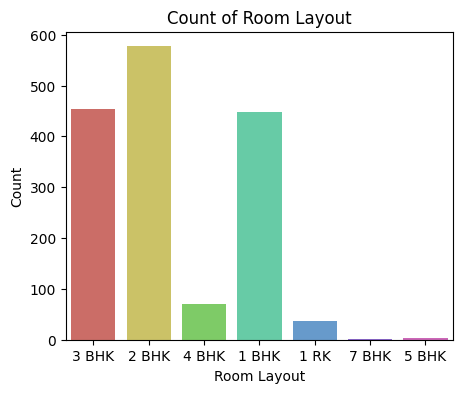

In [106]:
plt.figure(figsize = (5,4))
plt.xticks(rotation = 0)
plt.title("Count of Room Layout")
plt.xlabel("Room Layout")
plt.ylabel("Count")
sns.countplot(data = dff, x = "room_layout", palette = "hls")

In [105]:
data["property_type"].value_counts()

property_type
Apartment      1229
Independent     265
Villa            57
Studio           36
Penthouse         2
Name: count, dtype: int64

<Axes: title={'center': 'Count of property_type'}, xlabel='property_type', ylabel='Count'>

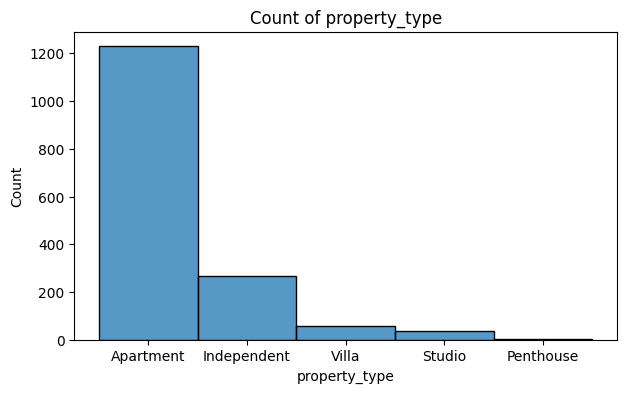

In [108]:
plt.figure(figsize = (7,4))
plt.xticks(rotation = 0)
plt.title("Count of property_type")
plt.xlabel("property_type")
plt.ylabel("Count")
sns.histplot(data = dff, x = "property_type")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\2359880834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = dff, x = "room_layout", y = "price", palette = "hls")


<Axes: title={'center': 'Price vs room_layout'}, xlabel='room_layout', ylabel='price'>

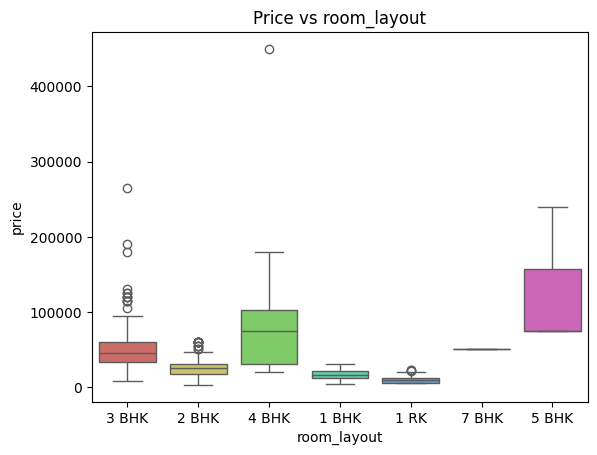

In [294]:
plt.title("Price vs room_layout")
sns.boxplot(data = dff, x = "room_layout", y = "price", palette = "hls")

<Axes: title={'center': 'Status Distribution'}, ylabel='count'>

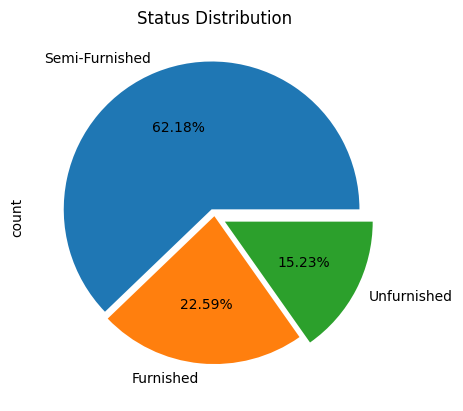

In [111]:
plt.title("Status Distribution")
dff["status"].value_counts().plot(kind ="pie", autopct = "%.2f%%", explode = [0.05,0.00,0.08])

- do visulaization price and room layout
- Visulation on price and location (filter top 10, average and low)
- Price and property type
- Area_sqFt and price
- Facing and price

<Axes: title={'center': 'Property Price vs No. of Property listing'}, xlabel='price', ylabel='Count'>

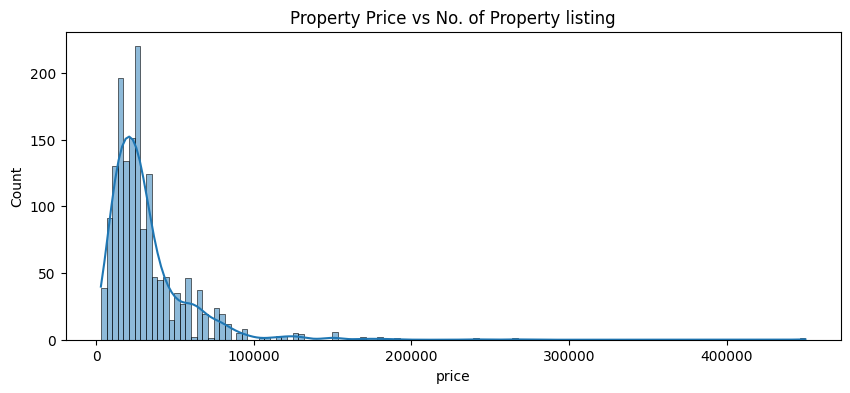

In [181]:
plt.figure(figsize = (10,4))
plt.title("Property Price vs No. of Property listing")
sns.histplot(data = dff, x = "price", kde = True)

<Axes: title={'center': 'Area Vs Count'}, xlabel='area_in_sqft', ylabel='Count'>

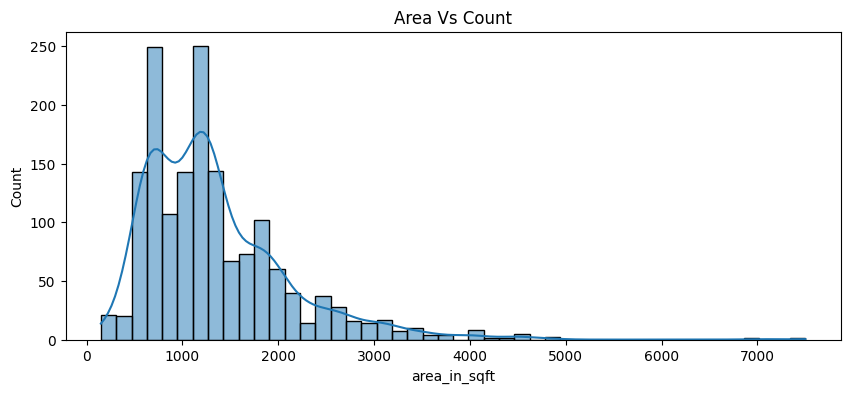

In [295]:
plt.figure(figsize = (10,4))
plt.title("Area Vs Count")
sns.histplot(data = dff, x = "area_in_sqft", kde = True)

In [212]:
dff.groupby("room_layout")["property_type"].value_counts()

room_layout  property_type
1 BHK        Apartment        363
             Independent       83
             Penthouse          1
1 RK         Studio            36
2 BHK        Apartment        437
             Independent      133
             Villa              6
             Penthouse          1
3 BHK        Apartment        401
             Independent       37
             Villa             16
4 BHK        Villa             34
             Apartment         28
             Independent        9
5 BHK        Independent        3
7 BHK        Villa              1
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

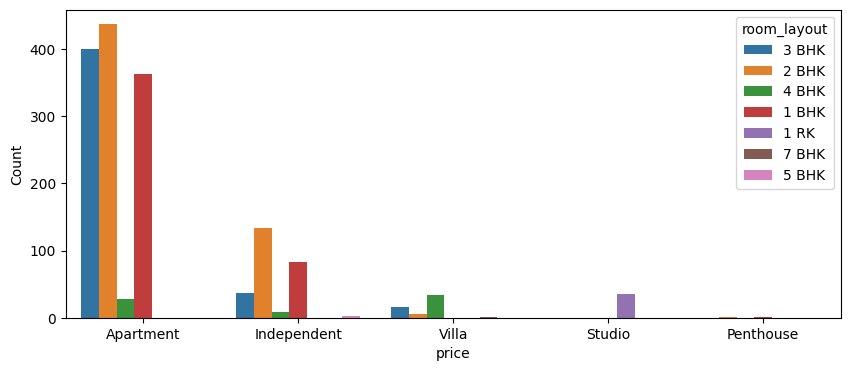

In [211]:
plt.figure(figsize = (10,4))
sns.histplot(data = dff, x = "price", kde = True)
sns.countplot(data = dff, x = "property_type", hue = "room_layout")

In [136]:
data.describe(include = "all").fillna(0)

,room_capacity,layout,property_type,location,city,price,area_in_sqft,status,no_bathrooms,facing,room_layout
count,1589.000000,1589,1589,1589,1589,1589.000000,1589.000000,1589,1589.000000,1589,1589
unique,0.000000,2,5,157,1,0.000000,0.000000,3,0.000000,12,7
top,0.000000,BHK,Apartment,Kondapur,Hyderabad,0.000000,0.000000,Semi-Furnished,0.000000,East,2 BHK
freq,0.000000,1553,1229,534,1589,0.000000,0.000000,988,0.000000,1223,577
mean,2.079924,0,0,0,0,31992.933921,1343.088735,0,1.995595,0,0
std,0.891765,0,0,0,0,26930.113562,762.235392,0,0.876135,0,0
min,1.000000,0,0,0,0,3000.000000,150.000000,0,1.000000,0,0
25%,1.000000,0,0,0,0,16000.000000,750.000000,0,1.000000,0,0
50%,2.000000,0,0,0,0,25000.000000,1200.000000,0,2.000000,0,0
75%,3.000000,0,0,0,0,37000.000000,1700.000000,0,3.000000,0,0


In [174]:
dff.corr(numeric_only = True)

,room_capacity,price,area_in_sqft,no_bathrooms
room_capacity,1.000000,0.621874,0.841601,0.923306
price,0.621874,1.000000,0.775253,0.620839
area_in_sqft,0.841601,0.775253,1.000000,0.820797
no_bathrooms,0.923306,0.620839,0.820797,1.000000


In [118]:
dff.sort_values(["price","room_layout"],ascending=(False,False))

,room_capacity,layout,property_type,location,city,price,area_in_sqft,status,no_bathrooms,facing,room_layout
83,4,BHK,Independent,Jubilee Hills,Hyderabad,450000,4000,Semi-Furnished,4,East,4 BHK
1537,3,BHK,Apartment,Madhapur,Hyderabad,265000,3430,Semi-Furnished,3,East,3 BHK
1554,5,BHK,Independent,Jubilee Hills,Hyderabad,240000,4500,Semi-Furnished,5,East,5 BHK
1157,3,BHK,Apartment,Madhapur,Hyderabad,190000,2680,Furnished,3,East,3 BHK
100,4,BHK,Apartment,Shaikpet,Hyderabad,180000,4415,Semi-Furnished,4,East,4 BHK
...,...,...,...,...,...,...,...,...,...,...,...
1400,1,BHK,Independent,Hayathnagar,Hyderabad,5000,800,Unfurnished,1,East,1 BHK
1430,1,BHK,Independent,Suraram,Hyderabad,5000,250,Furnished,1,East,1 BHK
1270,1,BHK,Independent,Nacharam,Hyderabad,4500,550,Unfurnished,1,East,1 BHK
1128,2,BHK,Apartment,Jubilee Hills,Hyderabad,3000,400,Unfurnished,2,East,2 BHK


In [128]:
price_roomlayout = dff.groupby("room_layout")["price"].mean()

<Axes: title={'center': 'Room Layout vs Price'}, xlabel='room_layout', ylabel='price'>

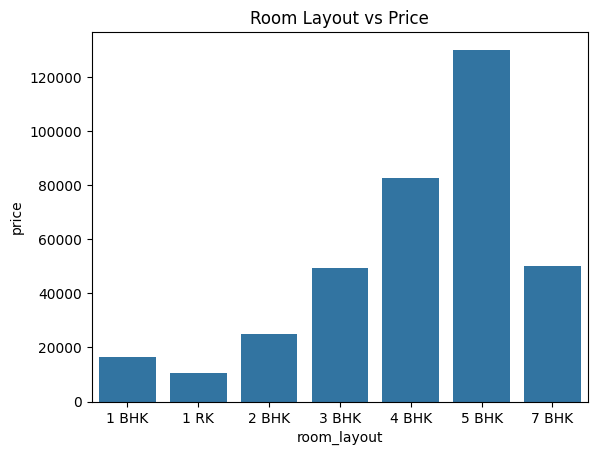

In [133]:
plt.title("Room Layout vs Price")
sns.barplot(data = price_roomlayout)

In [125]:
df_high_location = dff.sort_values(["price","location"],ascending=(False,False)).head(50)

<Axes: title={'center': 'Area Vs Price based on different location'}, xlabel='area_in_sqft', ylabel='price'>

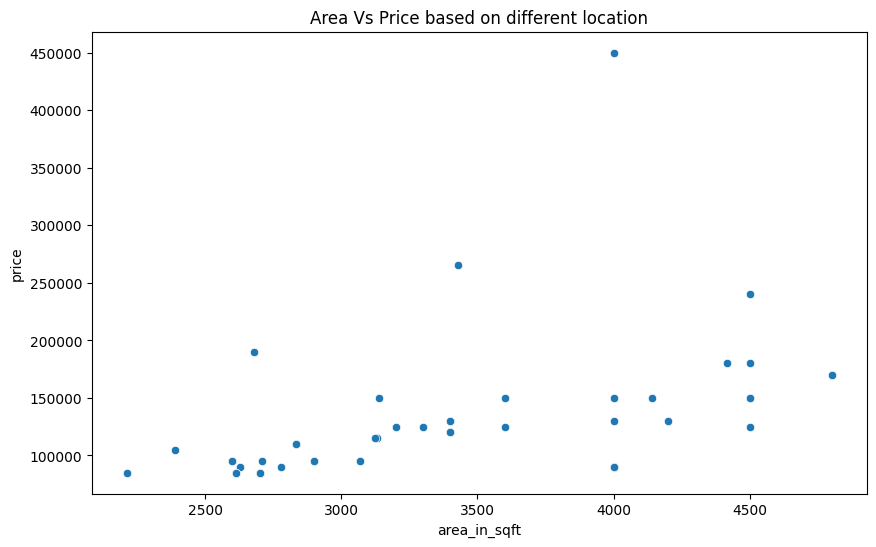

In [312]:
plt.figure(figsize = (10,6))
plt.title("Area Vs Price based on different location")
sns.scatterplot(data = df_high_location, x = "area_in_sqft", y = "price") #hue= "location"

<Axes: xlabel='room_layout', ylabel='price'>

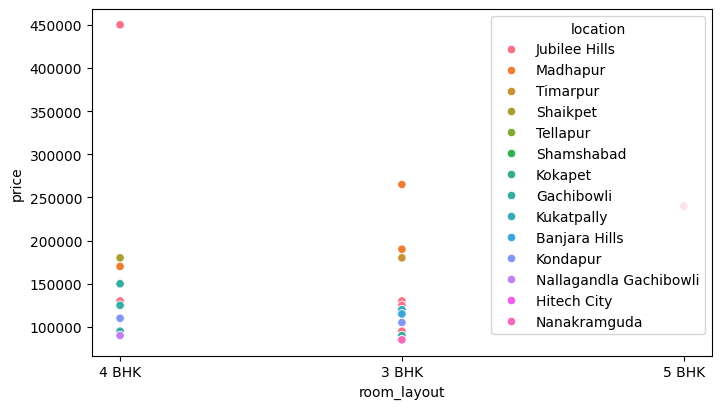

In [228]:
plt.figure(figsize = (8,4.5))
sns.scatterplot(data = df_high_location, x = "room_layout", y = "price", hue= "location")

In [124]:
dff.groupby("location")["price"].max().head()

location
AS Rao Nagar    17000
Ahmedguda       18000
Alwal           20700
Amberpet        27000
Ameerpet        22000
Name: price, dtype: int64

<Axes: title={'center': 'Property Heatmap'}>

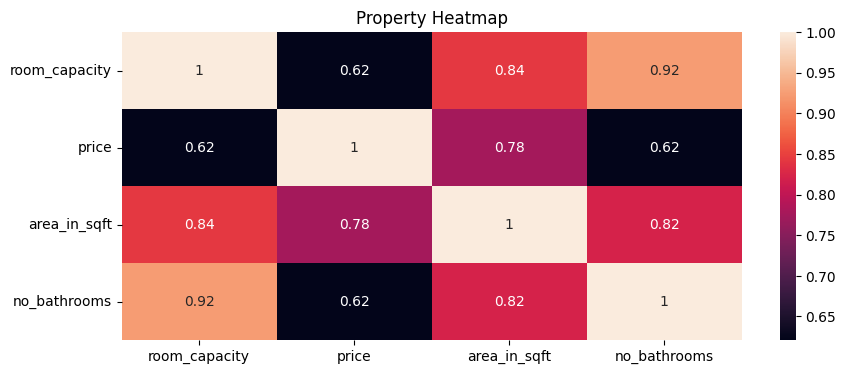

In [299]:
plt.figure(figsize=(10,4))
plt.title("Property Heatmap")
sns.heatmap(dff.corr(method = "pearson",numeric_only = True),annot = True)

In [207]:
pd.crosstab(df["status"],df["property_type"],normalize=True)*100

property_type,Apartment,Independent,Penthouse,Studio,Villa
status,,,,,
Furnished,19.6875,1.8125,0.000,0.4375,0.6250
Semi-Furnished,49.9375,8.8750,0.125,1.0000,2.3125
Unfurnished,7.4375,5.8750,0.000,0.8125,1.0625


In [199]:
dff["facing"] = dff["facing"].replace("2","East",regex = False).replace("1st","East",regex = False).replace("25th","East",regex = False).replace("3rd","East",regex = False).replace("4th","East",regex = False).replace("5th","East",regex = False).replace("East5th","East",regex = False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\3371006674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = dff, x = "facing", y = "price", palette = "hls")


<Axes: title={'center': 'Property Facing Direction vs Price'}, xlabel='facing', ylabel='price'>

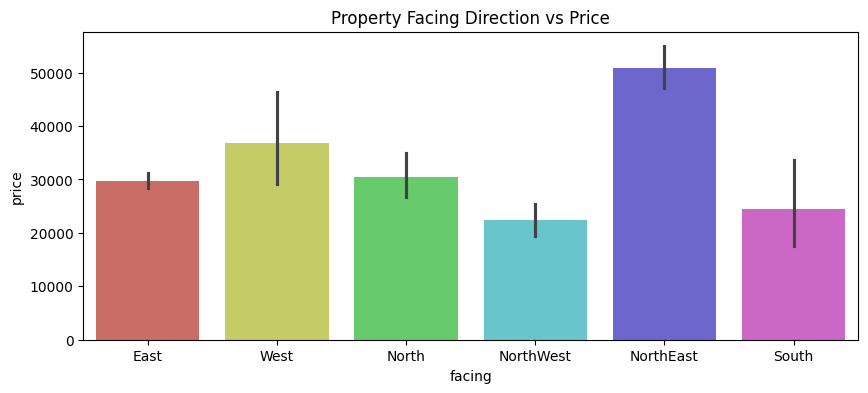

In [200]:
plt.figure(figsize=(10,4))
plt.title("Property Facing Direction vs Price")
sns.barplot(data = dff, x = "facing", y = "price", palette = "hls")

<Axes: title={'center': 'room_layout Vs Status'}, xlabel='room_layout'>

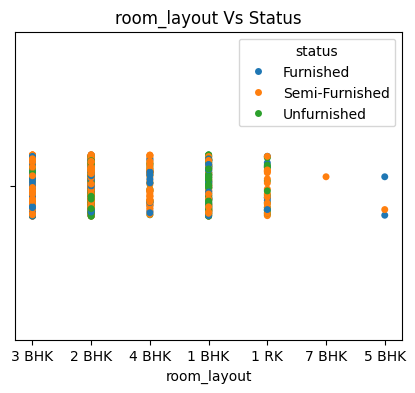

In [305]:
plt.figure(figsize=(5,4))
plt.title("room_layout Vs Status")
sns.stripplot(data = dff, x = "room_layout", hue = "status")

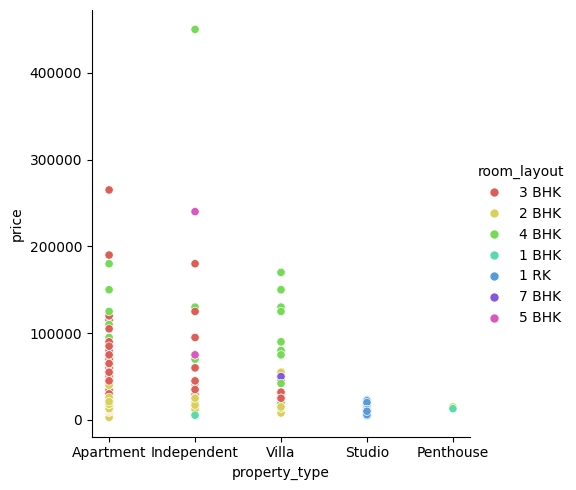

In [230]:
#Price and property type

sns.relplot(data = dff, x = "property_type", y = "price", hue = "room_layout", palette = "hls")

### Visulation on price and location (filter top 10, average and low)

In [220]:
dff.head(51)

,room_capacity,layout,property_type,location,city,price,area_in_sqft,status,no_bathrooms,facing,room_layout
0,3,BHK,Apartment,Attapur,Hyderabad,9000,600,Furnished,1,East,3 BHK
1,2,BHK,Apartment,Toli Chowki,Hyderabad,16000,1100,Semi-Furnished,2,East,2 BHK
2,4,BHK,Independent,Shamshabad,Hyderabad,45000,3000,Furnished,4,West,4 BHK
3,3,BHK,Apartment,Nanakramguda,Hyderabad,80000,3105,Furnished,3,East,3 BHK
4,2,BHK,Independent,Malakpet,Hyderabad,18000,1200,Unfurnished,2,East,2 BHK
5,4,BHK,Villa,Nizampet,Hyderabad,30000,2400,Unfurnished,4,East,4 BHK
6,3,BHK,Apartment,Uppal,Hyderabad,20000,1800,Furnished,3,East,3 BHK
7,3,BHK,Apartment,Banjara Hills,Hyderabad,115000,3130,Semi-Furnished,3,East,3 BHK
8,2,BHK,Apartment,Kondapur,Hyderabad,25000,1100,Semi-Furnished,2,North,2 BHK
9,2,BHK,Apartment,Nallagandla Gachibowli,Hyderabad,25000,1350,Semi-Furnished,2,East,2 BHK


In [316]:
top_10 = dff.sort_values("price", ascending = False).head(10)


In [320]:
top_10

,room_capacity,layout,property_type,location,city,price,area_in_sqft,status,no_bathrooms,facing,room_layout
83,4,BHK,Independent,Jubilee Hills,Hyderabad,450000,4000,Semi-Furnished,4,East,4 BHK
1537,3,BHK,Apartment,Madhapur,Hyderabad,265000,3430,Semi-Furnished,3,East,3 BHK
1554,5,BHK,Independent,Jubilee Hills,Hyderabad,240000,4500,Semi-Furnished,5,East,5 BHK
1157,3,BHK,Apartment,Madhapur,Hyderabad,190000,2680,Furnished,3,East,3 BHK
100,4,BHK,Apartment,Shaikpet,Hyderabad,180000,4415,Semi-Furnished,4,East,4 BHK
42,3,BHK,Independent,Timarpur,Hyderabad,180000,4500,Semi-Furnished,3,North,3 BHK
1451,4,BHK,Villa,Madhapur,Hyderabad,170000,4800,Semi-Furnished,4,East,4 BHK
1339,4,BHK,Villa,Madhapur,Hyderabad,170000,4800,Semi-Furnished,4,East,4 BHK
1575,4,BHK,Villa,Shamshabad,Hyderabad,150000,3140,Furnished,4,East,4 BHK
415,4,BHK,Villa,Kokapet,Hyderabad,150000,4500,Furnished,4,East,4 BHK


In [354]:
price_locationwise = dff.groupby("location")["price"].mean().reset_index()
price_locationwise

,location,price
0,AS Rao Nagar,9666.666667
1,Ahmedguda,18000.000000
2,Alwal,12272.384615
3,Amberpet,15500.000000
4,Ameerpet,13600.769231
...,...,...
152,West Marredpally,11000.000000
153,Yellareddy Guda,22000.000000
154,Yousufguda,17125.000000
155,kuntloor,9500.000000


In [355]:

top_locations = price_locationwise.sort_values('price', ascending = False).head(10)

In [356]:
top_locations

,location,price
143,Timarpur,180000.000000
29,Dilsukh Nagar,85000.000000
115,Punjagutta,80000.500000
68,Kokapet,79818.181818
7,Appa Junction Peerancheru,75000.000000
92,Moosapet,70000.000000
156,raidurgam,65000.000000
18,Banjara Hills,62678.571429
91,Mokila,62500.000000
140,Tellapur,61470.588235


In [357]:
top_10["location"].value_counts()

location
Madhapur         4
Jubilee Hills    2
Shaikpet         1
Timarpur         1
Shamshabad       1
Kokapet          1
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\2003874338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_locations, x = "location", y = "price", palette = "hls")


<Axes: title={'center': 'Top 10 Highest Priced properties location wise'}, xlabel='location', ylabel='price'>

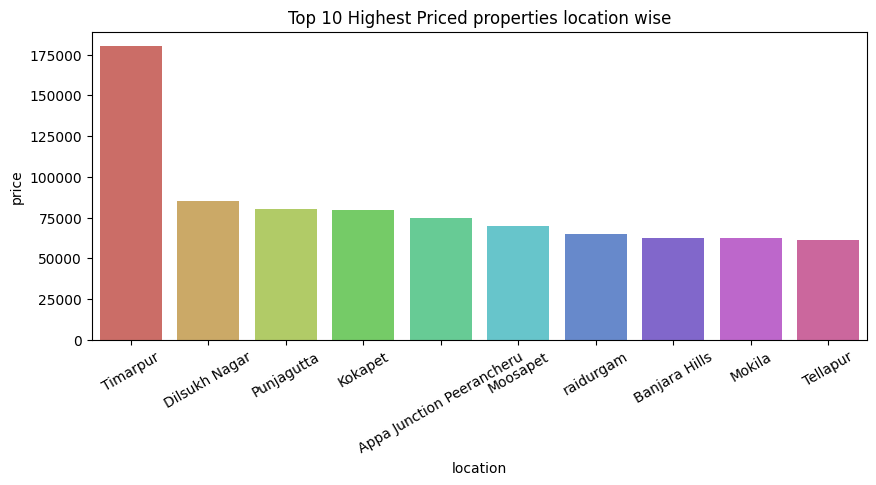

In [365]:
plt.figure(figsize = (10,4))
plt.xticks(rotation = 30)
plt.title("Top 10 Highest Priced properties location wise")
sns.barplot(data = top_locations, x = "location", y = "price", palette = "hls")

In [281]:
avg_location = dff.groupby("location")["price"].median().head(6)
avg_location.column = ['location', 'median']

In [283]:
avg_location.column

['location', 'median']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\3956573112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = avg_location, palette = "hls")


<Axes: xlabel='location', ylabel='price'>

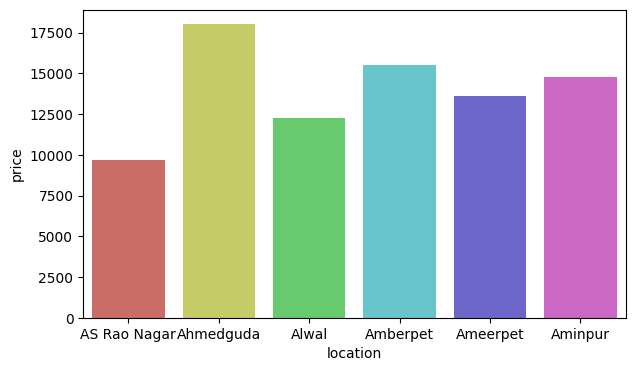

In [266]:
plt.figure(figsize = (7,4))
sns.barplot(data = avg_location, palette = "hls")

In [ ]:
low

In [359]:
lowest_location = price_locationwise.sort_values("price",ascending = True).head(10)

In [360]:
lowest_location

,location,price
56,Jillelaguda,5000.0
138,Suraram,5500.0
42,Gurram Guda,5500.0
23,Borabanda,6000.0
27,Cheeriyal,6000.0
36,Gajularamaram,6125.0
15,Balanagar,6500.0
45,Hanamkonda,6500.0
47,Hayathnagar,6875.0
103,Neredmet,7000.0


In [280]:
low_location["location"].value_counts()

location
Suraram          4
Gajularamaram    3
Jubilee Hills    2
Nacharam         1
Hayathnagar      1
Lakdikapul       1
Name: count, dtype: int64

<Axes: xlabel='location', ylabel='price'>

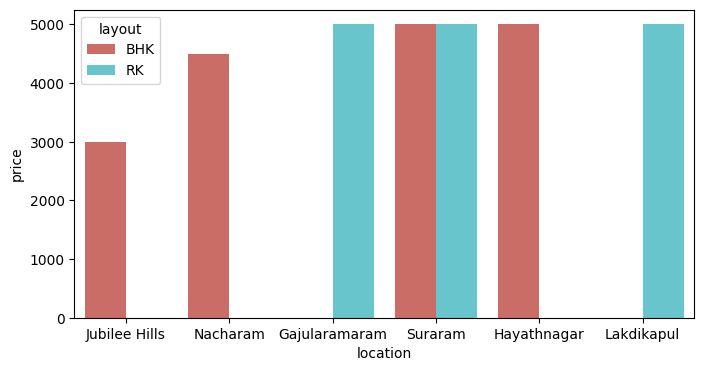

In [308]:
plt.figure(figsize = (8,4))
sns.barplot(data = low_location, x = "location", y = "price", hue = "layout",palette = "hls")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20232\1217298568.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = lowest_location, x = "location", y = "price", palette = "hls")


<Axes: title={'center': '10 Lowest Priced Properties location wise'}, xlabel='location', ylabel='price'>

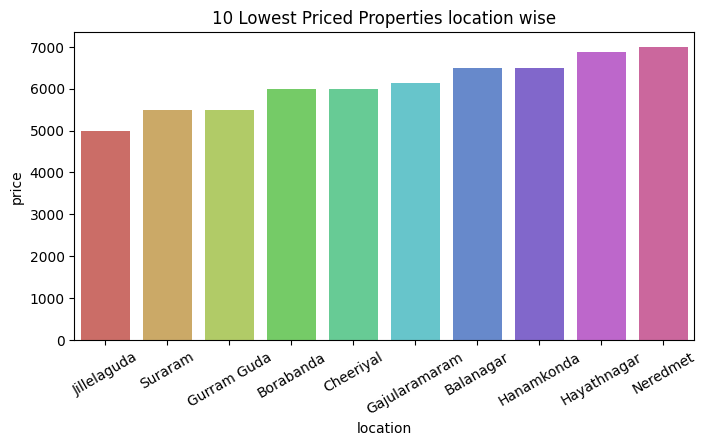

In [364]:
plt.figure(figsize = (8,4))
plt.xticks(rotation = 30)
plt.title("10 Lowest Priced Properties location wise")

sns.barplot(data = lowest_location, x = "location", y = "price", palette = "hls")